# Ford GoBike System Data
## by Peter Potros

## Preliminary Wrangling

> This document explores a dataset containing duration time and attributes for approximately 180,000 trips.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print first 5 rows
df = pd.read_csv('fordgobike.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# print dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
# convert start and end time from object type to datetime type
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [5]:
# extaract start time and day of each trip
df['start_timeofday'] = df['start_time'].dt.hour
df['start_dayofweek'] = df['start_time'].dt.day_name() 

In [41]:
# convert start_dayofweek and start_monthofyear into categorical types
ordinal_var_dict = {'start_dayofweek': df['start_dayofweek'].value_counts().index,
                    'start_timeofday': df['start_timeofday'].value_counts().index,}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

# reoder days of week    
df['start_dayofweek'] = pd.Categorical(df['start_dayofweek'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)    

In [7]:
# drop rows where gender equal Other
df = df.drop(df.query(' member_gender=="Other"').index)

In [8]:
# print numeric columns statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,179760.000000,179568.000000,179760.000000,179760.000000,179568.000000,179760.000000,179760.000000,179760.000000,171495.000000
mean,720.584246,138.300471,37.770670,-122.352595,135.956095,37.770881,-122.352175,4471.486026,1984.842328
std,1741.125449,111.843309,0.100350,0.117823,111.599295,0.100260,0.117403,1664.814766,10.113921
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,43.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,513.000000,102.000000,37.780760,-122.398285,100.000000,37.780955,-122.398279,4957.000000,1987.000000
75%,794.000000,239.000000,37.797280,-122.287610,234.000000,37.797280,-122.289370,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179760 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               179760 non-null int64
start_time                 179760 non-null datetime64[ns]
end_time                   179760 non-null datetime64[ns]
start_station_id           179568 non-null float64
start_station_name         179568 non-null object
start_station_latitude     179760 non-null float64
start_station_longitude    179760 non-null float64
end_station_id             179568 non-null float64
end_station_name           179568 non-null object
end_station_latitude       179760 non-null float64
end_station_longitude      179760 non-null float64
bike_id                    179760 non-null int64
user_type                  179760 non-null object
member_birth_year          171495 non-null float64
member_gender              171495 non-null object
bike_share_for_all_trip    179760 non-null object
start_timeofday            179760 non-null category
start_dayofweek 

### What is the structure of your dataset?

> 179760 rows and 16 columns, Most variables are numeric in nature, but the variables user_type, member_gender, start_timeofday and start_dayofweek are categorical types.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best affecting the duraution of the trips in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> start_timeofday, start_dayofweek, user_type, member_birth_year, member_gender.

## Univariate Exploration

   > I'll start by looking at the distribution of the main variable of interest: duration_sec.

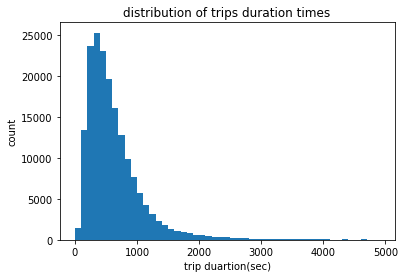

In [10]:
# start with a standard-scaled plot
bins = np.arange(0, 5000, 100);
plt.hist(data=df, x='duration_sec', bins=bins);
plt.xlabel('trip duartion(sec)')
plt.ylabel('count')
plt.title('distribution of trips duration times')
plt.show()

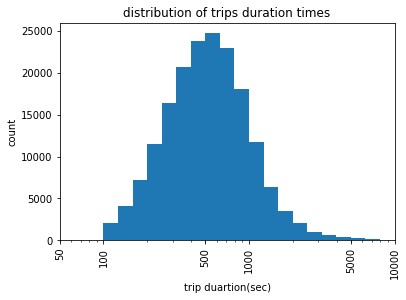

In [11]:
# there's a long tail in the distribution, so let's put it on a log scale instead
bins = 10 ** np.arange(2, 4, 0.1);
plt.hist(data=df, x='duration_sec', bins=bins);
plt.xscale('log');
xticks = [50, 100, 500, 1000, 5000, 10000]
plt.xticks(xticks, xticks)
plt.xlabel('trip duartion(sec)')
plt.xticks(rotation=90)
plt.ylabel('count')
plt.title('distribution of trips duration times')
plt.show()

>duration has a long-tailed distribution, with a lot of trips have low duaration sec. 
 When plotted on a log-scale, the duaration distribution looks normal distribuation, with one peak between 300 and 700 sec.

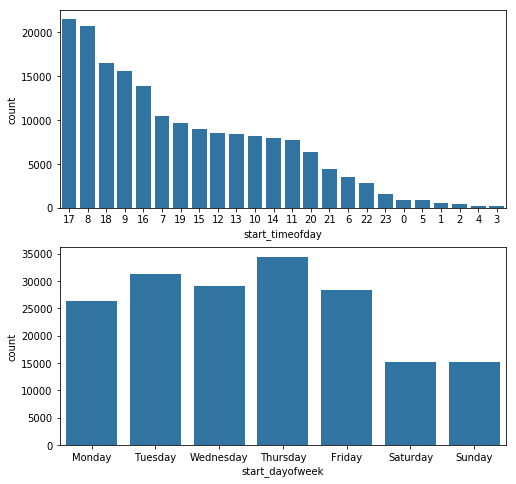

In [42]:
# plotting distribution of start time of trips
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

base_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_timeofday', color = base_color, ax = ax[0])
sb.countplot(data = df, x = 'start_dayofweek', color = base_color, ax = ax[1])

plt.show()

>most trips start in 5 pm and 8 am when people go to and back from work
 number of trips start everyday of week is almost the same except sundays and sturdays which the weekends

Text(0.5, 1.0, 'distribution of users birth year')

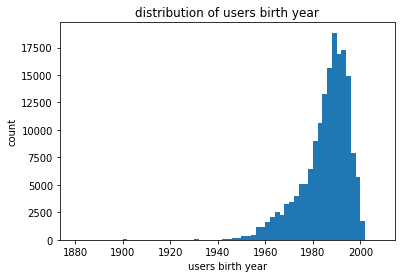

In [14]:
# plotting distribution of users birth year.
bins = np.arange(1880, 2010, 2);
plt.hist(data=df, x='member_birth_year', bins=bins);
plt.xlabel('users birth year')
plt.ylabel('count')
plt.title('distribution of users birth year')

>most of users were born between 1960 to 2000 with outliers before 1960 so we will focus on this interval 

Text(0.5, 1.0, 'distribution of users birth year')

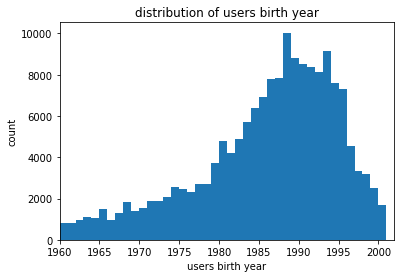

In [15]:
# focuse of the distribution of users birth year between 1950 to 2000
bins = np.arange(1960, 2002, 1);
plt.hist(data=df, x='member_birth_year', bins=bins);
plt.xlim(1960,2002)
plt.xlabel('users birth year')
plt.ylabel('count')
plt.title('distribution of users birth year')

>the most of users were born in 1988, in general between 1985 to 1995

Text(0.5, 1.0, 'distribution of users types')

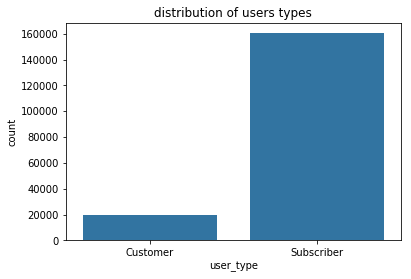

In [16]:
# plooting distribution of users types
sb.countplot(data=df, x='user_type', color=base_color);
plt.title('distribution of users types')

>number of users that are subscribers are much higher than are customers

Text(0.5, 1.0, 'distribution of users genders')

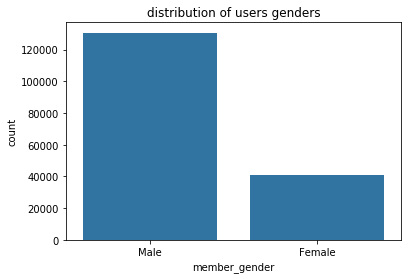

In [17]:
# plotting distribution of users genders
sb.countplot(data=df, x='member_gender', color=base_color);
plt.title('distribution of users genders')

>number of males are highr than females 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_sec variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked normal, with one peak between 300 and 700 sec.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I extracted start_timeofday and start_dayofweek from start_time to investigate which times and days more trips start.  

## Bivariate Exploration



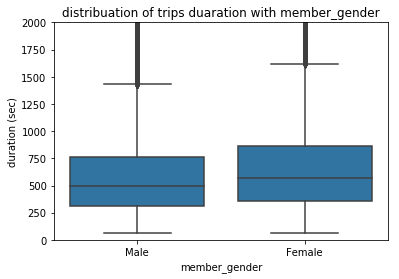

In [18]:
# plotting boxplot to show the distribuation of trips duaration with member_gender
base_color = sb.color_palette()[0]
sb.boxplot(data=df, x='member_gender', y='duration_sec', color=base_color);
plt.ylim(0,2000);
plt.ylabel('duration (sec)');
plt.title('distribuation of trips duaration with member_gender');

>from boxplot between gender and duration of trips shown that the females have long duartion median than males.

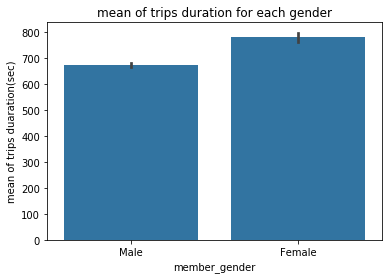

In [19]:
# plotting barplot to show the avg trips duration for each gender
sb.barplot(data=df, x='member_gender', y='duration_sec', color=base_color);
plt.ylabel('mean of trips duaration(sec)');
plt.title('mean of trips duration for each gender');

>the barplot between gender and  mean of trips dration confirms that trips of females take duartion time longer than males. 

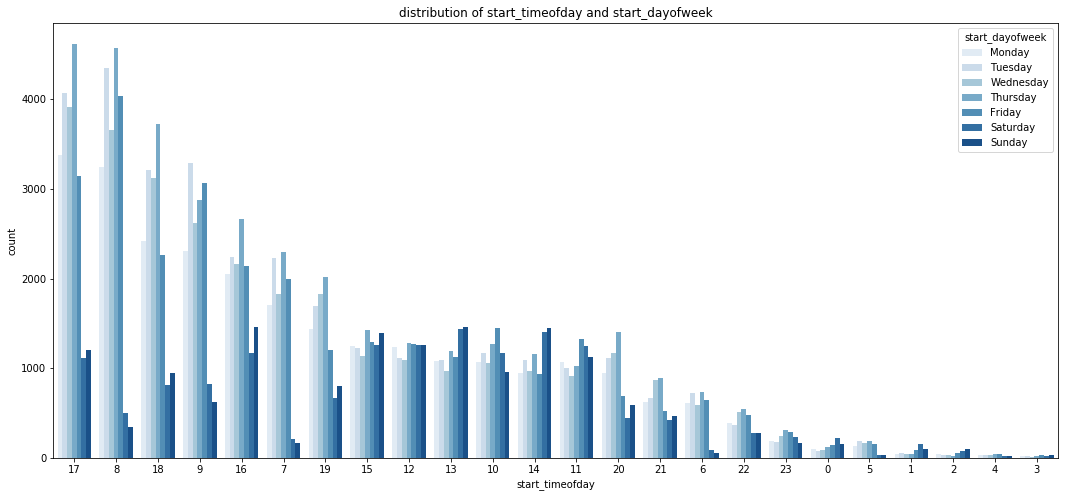

In [43]:
# plotting countplot to show the distribution of two categorial types start_timeofday and start_dayofweek
plt.figure(figsize = [18, 8])
sb.countplot(data = df, x = 'start_timeofday', hue = 'start_dayofweek', palette = 'Blues');
plt.title('distribution of start_timeofday and start_dayofweek');

>there is interaction between the hours and days which most of trips start, at 7,8,9 am and 16,17,18 pm most of trips start on  all the weekdays but not on sundays and stardays where the wwekend.
 on the other hand at the rest of day the number of trips start equally on all days of the week which aren't connected to work  hours.   

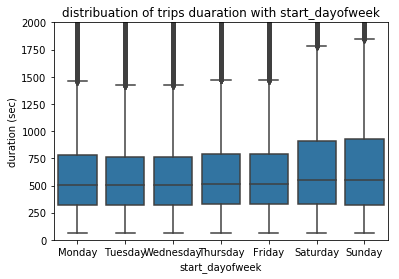

In [44]:
# plotting boxplot to show the distribuation of trips duaration with start_dayofweek
base_color = sb.color_palette()[0]
sb.boxplot(data=df, x='start_dayofweek', y='duration_sec', color=base_color);
plt.ylim(0,2000);
plt.ylabel('duration (sec)')
plt.title('distribuation of trips duaration with start_dayofweek');

>although sundays and saturdyas have the smallest number of trips but most trips in these days have median duration times than other days of week, so will see the average duaration times of these days. 

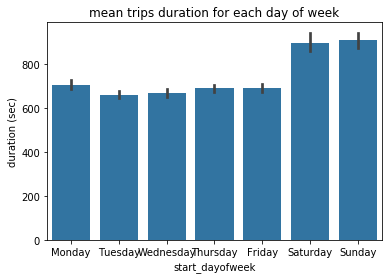

In [45]:
# plotting barplot to show the avg trips duration for each day of week
sb.barplot(data=df, x='start_dayofweek', y='duration_sec', color=base_color);
plt.ylabel('duration (sec)');
plt.title('mean trips duration for each day of week');

>as expected sundays and saturdays have more average duaration times of trip than other days which helps in investigating that the trips in these days not for work but for exercices or enjoying unlike other days when the trips take on avg 10 minutes.

Text(0.5, 1.0, 'distribuation of trips duaration with user type')

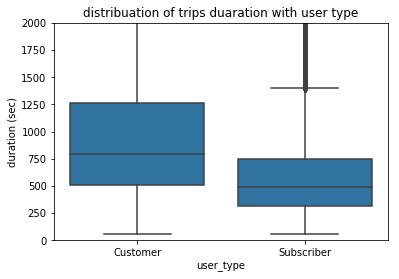

In [25]:
# plotting boxplot to show the distribuation of trips duaration with user type
sb.boxplot(data=df, x='user_type', y='duration_sec', color=base_color);
plt.ylim(0,2000);
plt.ylabel('duration (sec)');
plt.title('distribuation of trips duaration with user type')

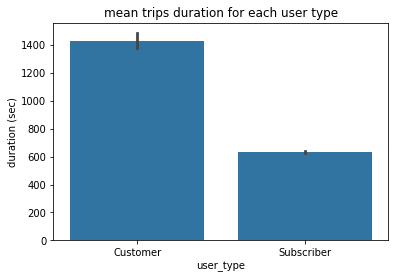

In [24]:
# plotting bar plot to show avg trips duration for each user type
sb.barplot(data=df, x='user_type', y='duration_sec', color=base_color);
plt.ylabel('duration (sec)');
plt.title('mean trips duration for each user type');

>as obvious that cutomers which are very small numbers compared to subscribers take longer duration times of trip than subscribers. 

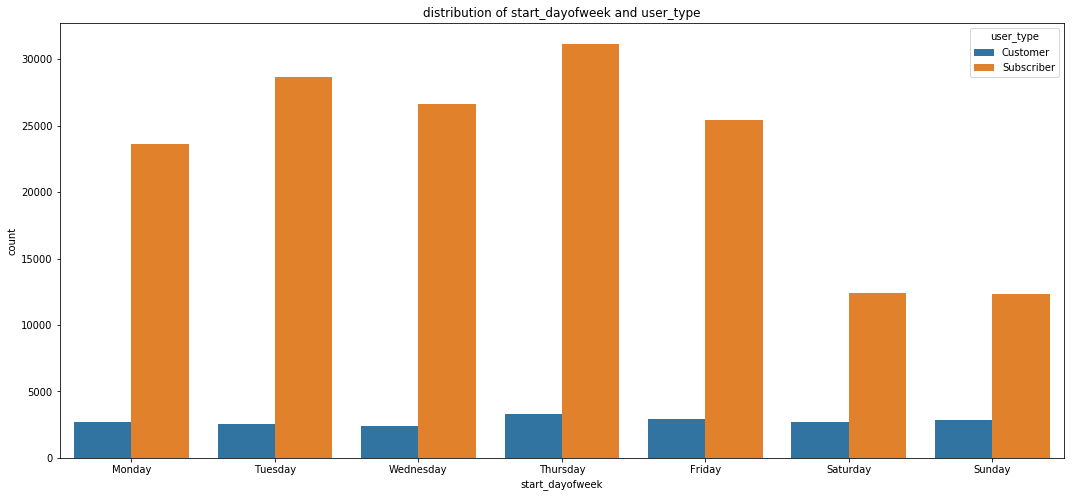

In [46]:
# plotting countplot to show the distribution of two categorial types start_dayofweek and user_type
plt.figure(figsize = [18, 8])
sb.countplot(data = df, x = 'start_dayofweek', hue = 'user_type');
plt.title('distribution of start_dayofweek and user_type');

>number of customers are the same for all days of week, i think these users which uses bikes for practicing and exercieces not for work beacause the avg duration times of their trips are longer than for consumers. 

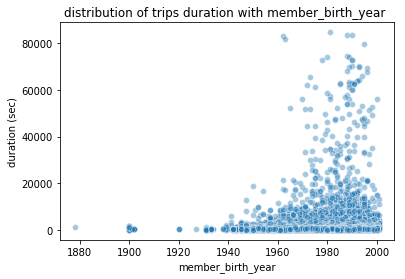

In [28]:
# plotting scatterplot between member_birth_year and duration_sec
sb.scatterplot(data=df, x='member_birth_year', y='duration_sec', alpha=.4);
plt.ylabel('duration (sec)');
plt.title('distribution of trips duration with member_birth_year ');

>there is no linear relationship between trips duaration and users birth year but  most of users that take longer duration times are younger users.

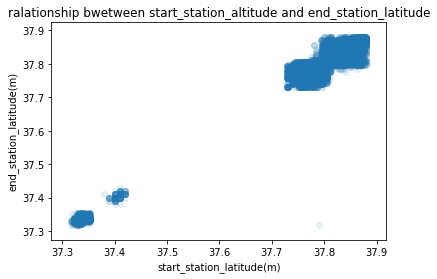

In [33]:
# plotting scatterplot between start_station_altitude and end_station_latitude
plt.scatter(data=df, x='start_station_latitude', y='end_station_latitude', alpha=.1);
plt.xlabel('start_station_latitude(m)')
plt.ylabel('end_station_latitude(m)')
plt.title('ralationship bwetween start_station_altitude and end_station_latitude');

>there is a linear relationship between start_station_latitude and end_station_latitude, so we will check the relations between these variables and duration of trips. 

Text(0.5, 1.0, 'distribution of trips duartion times with start_station_latitude ')

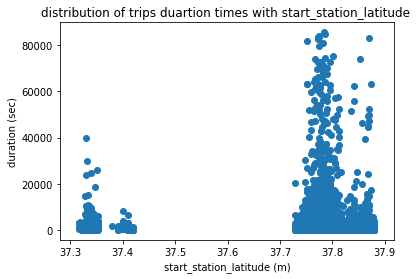

In [34]:
# plotting distribution of trips duartion times with start_station_latitude 
plt.scatter(data=df, x='start_station_latitude', y='duration_sec');
plt.xlabel('start_station_latitude (m)')
plt.ylabel('duration (sec)')
plt.title('distribution of trips duartion times with start_station_latitude ')

>there is no interaction between start_station_latitude and duration of trips

Text(0.5, 1.0, 'distribution of trips duartion times with end_station_latitude ')

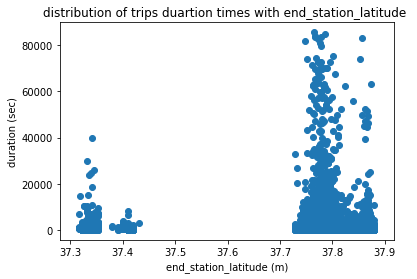

In [35]:
# plotting distribution of trips duartion times with end_station_latitude 
plt.scatter(data=df, x='end_station_latitude', y='duration_sec');
plt.xlabel('end_station_latitude (m)')
plt.ylabel('duration (sec)')
plt.title('distribution of trips duartion times with end_station_latitude ')

>there is no interaction between end_station_latitude and duration of trips

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> there are relationship between days of week, user_type and member_birth_year with the duration of trips.
and relationship between rush hours and weekdays with then number of trips.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> linear relationship was found between start_station_latitude and end_station_latitude, but neither of these variables show a strong correlation with duartion of trips, so they won't be explored further. 

## Multivariate Exploration


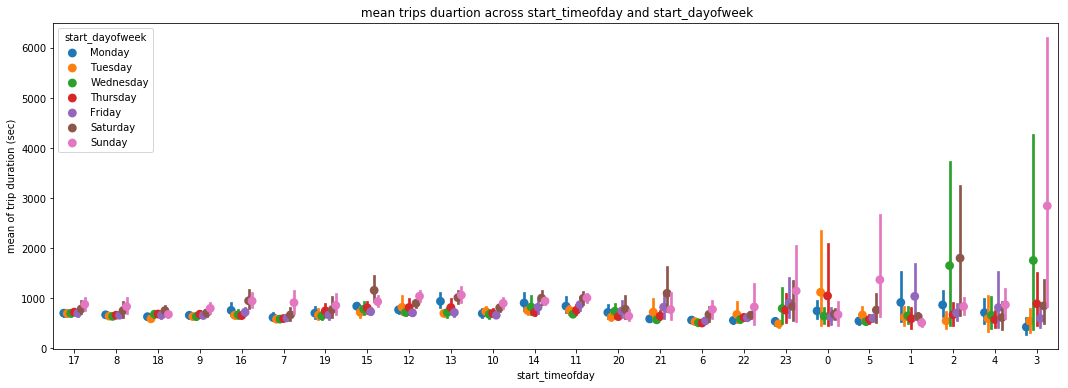

In [47]:
# plotting the mean trips duartion across start_timeofday and start_dayofweek
fig = plt.figure(figsize = [18,6])
ax = sb.pointplot(data = df, x = 'start_timeofday', y = 'duration_sec', hue = 'start_dayofweek',
            linestyles = '', dodge = 0.5)
plt.title('trips duration across start_timeofday and start_dayofweek')
plt.ylabel('mean of trip duration (sec)')
plt.title(' mean trips duartion across start_timeofday and start_dayofweek');
plt.show();

>the trips that start at all hours of sundays and saturdays take longer duration mean than the other days of week.

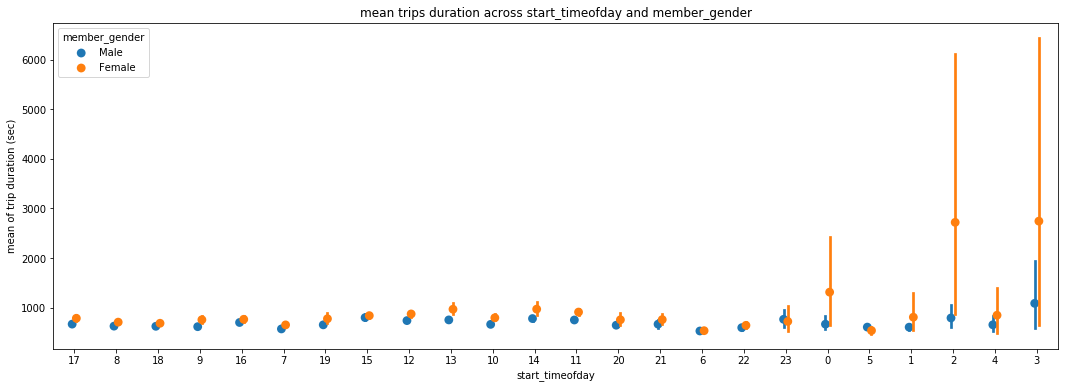

In [38]:
# plotting the mean trips duartion across start_timeofday and member_gender
fig = plt.figure(figsize = [18,6])
ax = sb.pointplot(data = df, x = 'start_timeofday', y = 'duration_sec', hue = 'member_gender',
            linestyles = '', dodge = 0.1)
plt.title('mean trips duration across start_timeofday and member_gender')
plt.ylabel('mean of trip duration (sec)')
plt.show();

>as expected that females have more duration mean of trips than males at all hours of day. 

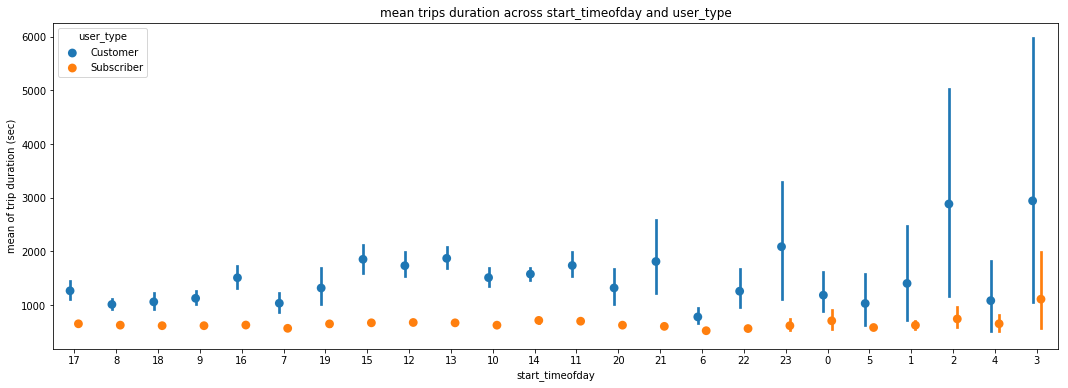

In [39]:
# plotting the mean trips duartion across start_timeofday and user_type
fig = plt.figure(figsize = [18,6])
ax = sb.pointplot(data = df, x = 'start_timeofday', y = 'duration_sec', hue = 'user_type',
            linestyles = '', dodge = 0.2)
plt.title('mean trips duration across start_timeofday and user_type')
plt.ylabel('mean of trip duration (sec)')
plt.show();

>as expected that customers have more duration mean of trips than subscribers at all hours of day. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the trips take lower duration times at weekdays especially at working hours like 8, 9 am and 16, 17 pm beacause users which are subscribers use bikes to go and back from work not for joueney or exercises as at sundays and saturdays for customers, but females tak longer times than males in general.

### Were there any interesting or surprising interactions between features?

> no